# This is a code package for analyzing jet responses

In [1]:
import ROOT
ROOT.enableJSVis()
from ROOT import TFile, TCanvas, TGraph, TF1, TF2, TMath, TLine, TLegend
from ROOT import TDecompSVD, TVectorD, TMatrixD, TH1D, TH2D, TH3D, TProfile, TProfile2D
from ROOT import gBenchmark, gStyle, gROOT, gDirectory
from ROOT import kBlack, kBlue, kRed, kCyan, kMagenta, kVisibleSpectrum
from ROOT import kFullCircle
gStyle.SetOptStat(0)
from array import array

Welcome to JupyROOT 6.20/04


In [2]:
faBarrel = TF1("faBarrel", "[0]+((([1]+([2]/sqrt(x)))*exp(-(x^[6]/[3])))-([4]*exp(-(x^[7]/[5]))))", 0., 1000.);
faEndcap = TF1("faEndcap", "[0]+((([1]+([2]/sqrt(x)))*exp(-(x^[6]/[3])))-([4]*exp(-(x^[7]/[5]))))", 0., 1000.);

faBarrel.SetParameter(0, -30.7141);
faBarrel.SetParameter(1, 31.7583);
faBarrel.SetParameter(2, 4.40594);
faBarrel.SetParameter(3, 1.70914);
faBarrel.SetParameter(4, 0.0613696);
faBarrel.SetParameter(5, 0.000104857);
faBarrel.SetParameter(6, -1.38927);
faBarrel.SetParameter(7, -0.743082);

faEndcap.SetParameter(0, 1.17227);
faEndcap.SetParameter(1, 13.1489);
faEndcap.SetParameter(2, -29.1672);
faEndcap.SetParameter(3, 0.604223);
faEndcap.SetParameter(4, 0.0426363);
faEndcap.SetParameter(5, 3.30898e-15);
faEndcap.SetParameter(6, 0.165293);
faEndcap.SetParameter(7, -7.56786);


fbBarrel = TF1("fbBarrel", "[0]+((([1]+([2]/sqrt(x)))*exp(-(x^[6]/[3])))-([4]*exp(-(x^[7]/[5]))))", 0., 1000.);
fbEndcap = TF1("fbEndcap", "[0]+((([1]+([2]/sqrt(x)))*exp(-(x^[6]/[3])))-([4]*exp(-(x^[7]/[5]))))", 0., 1000.);

fbBarrel.SetParameter(0, 2.25366);
fbBarrel.SetParameter(1, 0.537715);
fbBarrel.SetParameter(2, -4.81375);
fbBarrel.SetParameter(3, 12.109);
fbBarrel.SetParameter(4, 1.80577);
fbBarrel.SetParameter(5, 0.187919);
fbBarrel.SetParameter(6, -6.26234);
fbBarrel.SetParameter(7, -0.607392);

fbEndcap.SetParameter(0, -0.974251);
fbEndcap.SetParameter(1, 1.61733);
fbEndcap.SetParameter(2, 0.0629183);
fbEndcap.SetParameter(3, 7.78495);
fbEndcap.SetParameter(4, -0.774289);
fbEndcap.SetParameter(5, 7.81399e-05);
fbEndcap.SetParameter(6, 0.139116);
fbEndcap.SetParameter(7, -4.25551);


fcBarrel = TF1("fcBarrel", "[0]+((([1]+([2]/sqrt(x)))*exp(-(x^[6]/[3])))-([4]*exp(-(x^[7]/[5]))))", 0., 1000.);
fcEndcap = TF1("fcEndcap", "[0]+((([1]+([2]/sqrt(x)))*exp(-(x^[6]/[3])))-([4]*exp(-(x^[7]/[5]))))", 0., 1000.);

fcBarrel.SetParameter(0, 1.5125962);
fcBarrel.SetParameter(1, 0.855057);
fcBarrel.SetParameter(2, -6.04199);
fcBarrel.SetParameter(3, 2.08229);
fcBarrel.SetParameter(4, 0.592266);
fcBarrel.SetParameter(5, 0.0291232);
fcBarrel.SetParameter(6, 0.364802);
fcBarrel.SetParameter(7, -1.50142);

fcEndcap.SetParameter(0, 1.01863);
fcEndcap.SetParameter(1, 1.29787);
fcEndcap.SetParameter(2, -3.97293);
fcEndcap.SetParameter(3, 21.7805);
fcEndcap.SetParameter(4, 0.810195);
fcEndcap.SetParameter(5, 0.234134);
fcEndcap.SetParameter(6, 1.42226);
fcEndcap.SetParameter(7, -0.0997326);


faEtaBarrelEH = TF1("faEtaBarrelEH", "[0]+[1]*exp(-x/[2])", 0., 1000.);
faEtaEndcapEH = TF1("faEtaEndcapEH", "[0]+[1]*exp(-x/[2])", 0., 1000.);

faEtaBarrelEH.SetParameter(0, 0.0185555);
faEtaBarrelEH.SetParameter(1, -0.0470674);
faEtaBarrelEH.SetParameter(2, 396.959);

faEtaEndcapEH.SetParameter(0, 0.0112692);
faEtaEndcapEH.SetParameter(1, -2.68063);
faEtaEndcapEH.SetParameter(2, 2.90973);


fbEtaBarrelEH = TF1("fbEtaBarrelEH", "[0]+[1]*exp(-x/[2])", 0., 1000.);
fbEtaEndcapEH = TF1("fbEtaEndcapEH", "[0]+[1]*exp(-x/[2])", 0., 1000.);

fbEtaBarrelEH.SetParameter(0, 0.0396458);
fbEtaBarrelEH.SetParameter(1, 0.114128);
fbEtaBarrelEH.SetParameter(2, 251.405);

fbEtaEndcapEH.SetParameter(0, -0.0192991);
fbEtaEndcapEH.SetParameter(1, -0.265);
fbEtaEndcapEH.SetParameter(2, 80.5502);


fcEtaBarrelEH = TF1("fcEtaBarrelEH","[3]*((x-[0])^[1])+[2]", 0., 5.);
fdEtaEndcapEH = TF1("fdEtaEndcapEH","[3]*((x-[0])^[1])+[2]",0.,5.);

fcEtaBarrelEH.SetParameter(0, 0);
fcEtaBarrelEH.SetParameter(1, 2);
fcEtaBarrelEH.SetParameter(2, 0);
fcEtaBarrelEH.SetParameter(3, 1);

fdEtaEndcapEH.SetParameter(0,1.5);
fdEtaEndcapEH.SetParameter(1,2.0);
fdEtaEndcapEH.SetParameter(2,0.6);
fdEtaEndcapEH.SetParameter(3,1.0);

faEtaBarrelH = TF1("faEtaBarrelH", "[0]+[1]*x", 0., 1000.);
faEtaEndcapH = TF1("faEtaEndcapH", "[0]+[1]*exp(-x/[2])+[3]*[3]*exp(-x*x/([4]*[4]))", 0., 1000.);

faEtaBarrelH.SetParameter(0, 0.00434994);
faEtaBarrelH.SetParameter(1, -5.16564e-06);

faEtaEndcapH.SetParameter(0, -0.0106029);
faEtaEndcapH.SetParameter(1, -0.692207);
faEtaEndcapH.SetParameter(2, 0.0542991);
faEtaEndcapH.SetParameter(3, -0.171435);
faEtaEndcapH.SetParameter(4, -61.2277);


fbEtaBarrelH = TF1("fbEtaBarrelH", "[0]+[1]*exp(-x/[2])", 0., 1000.);
fbEtaEndcapH = TF1("fbEtaEndcapH", "[0]+[1]*exp(-x/[2])+[3]*[3]*exp(-x*x/([4]*[4]))", 0., 1000.);

fbEtaBarrelH.SetParameter(0, -0.0232604);
fbEtaBarrelH.SetParameter(1, 0.0937525);
fbEtaBarrelH.SetParameter(2, 34.9935);

fbEtaEndcapH.SetParameter(0, 0.0214894);
fbEtaEndcapH.SetParameter(1, -0.266704);
fbEtaEndcapH.SetParameter(2, 5.2112);
fbEtaEndcapH.SetParameter(3, 0.303578);
fbEtaEndcapH.SetParameter(4, -104.367);


fkBarrel = TF2("fkBarrel", "([0]+((([1]+([2]/sqrt(x)))*exp(-(x^[6]/[3])))-([4]*exp(-(x^[7]/[5])))))*(1+[8]+[9]*exp(-x/[10])+1.3*([11]+[12]*exp(-x/[13]))*([17]*((y-[14])^[15])+[16]))", 0., 200., 0., 1.48);
fkBarrel.SetParameter(0, -30.7141);
fkBarrel.SetParameter(1, 31.7583);
fkBarrel.SetParameter(2, 4.40594);
fkBarrel.SetParameter(3, 1.70914);
fkBarrel.SetParameter(4, 0.0613696);
fkBarrel.SetParameter(5, 0.000104857);
fkBarrel.SetParameter(6, -1.38927);
fkBarrel.SetParameter(7, -0.743082);
fkBarrel.SetParameter(8, 0.0185555);
fkBarrel.SetParameter(9, -0.0470674);
fkBarrel.SetParameter(10, 396.959);
fkBarrel.SetParameter(11, 0.0396458);
fkBarrel.SetParameter(12, 0.114128);
fkBarrel.SetParameter(13, 251.405);
fkBarrel.SetParameter(14, 0);
fkBarrel.SetParameter(15, 2);
fkBarrel.SetParameter(16, 0);
fkBarrel.SetParameter(17, 1);

fqBarrel = TF1("fqBarrel", "([0]+((([1]+([2]/sqrt(x)))*exp(-(x^[6]/[3])))-([4]*exp(-(x^[7]/[5])))))*(1+[8]+[9]*exp(-x/[10])+1.3*([11]+[12]*exp(-x/[13]))*([17]*((0-[14])^[15])+[16]))", 0.1, 1000.);
fqBarrel.SetParameter(0, -30.7141);
fqBarrel.SetParameter(1, 31.7583);
fqBarrel.SetParameter(2, 4.40594);
fqBarrel.SetParameter(3, 1.70914);
fqBarrel.SetParameter(4, 0.0613696);
fqBarrel.SetParameter(5, 0.000104857);
fqBarrel.SetParameter(6, -1.38927);
fqBarrel.SetParameter(7, -0.743082);
fqBarrel.SetParameter(8, 0.0185555);
fqBarrel.SetParameter(9, -0.0470674);
fqBarrel.SetParameter(10, 396.959);
fqBarrel.SetParameter(11, 0.0396458);
fqBarrel.SetParameter(12, 0.114128);
fqBarrel.SetParameter(13, 251.405);
fqBarrel.SetParameter(14, 0);
fqBarrel.SetParameter(15, 2);
fqBarrel.SetParameter(16, 0);
fqBarrel.SetParameter(17, 1);

fsBarrel = TF1("fsBarrel", "([0]+((([1]+([2]/sqrt(x)))*exp(-(x^[6]/[3])))-([4]*exp(-(x^[7]/[5])))))*(1+[8]+[9]*exp(-x/[10])+1.3*([11]+[12]*exp(-x/[13]))*([17]*((1.48-[14])^[15])+[16]))", 0.1, 1000.);
fsBarrel.SetParameter(0, -30.7141);
fsBarrel.SetParameter(1, 31.7583);
fsBarrel.SetParameter(2, 4.40594);
fsBarrel.SetParameter(3, 1.70914);
fsBarrel.SetParameter(4, 0.0613696);
fsBarrel.SetParameter(5, 0.000104857);
fsBarrel.SetParameter(6, -1.38927);
fsBarrel.SetParameter(7, -0.743082);
fsBarrel.SetParameter(8, 0.0185555);
fsBarrel.SetParameter(9, -0.0470674);
fsBarrel.SetParameter(10, 396.959);
fsBarrel.SetParameter(11, 0.0396458);
fsBarrel.SetParameter(12, 0.114128);
fsBarrel.SetParameter(13, 251.405);
fsBarrel.SetParameter(14, 0);
fsBarrel.SetParameter(15, 2);
fsBarrel.SetParameter(16, 0);
fsBarrel.SetParameter(17, 1);

fkEndcap = TF1("fkEndcap", "([0]+((([1]+([2]/sqrt(x)))*exp(-(x^[6]/[3])))-([4]*exp(-(x^[7]/[5])))))*(1.+[8]+[9]*exp(-x/[10]))", 0.1, 1000.);
fkEndcap.SetParameter(0, 1.17227);
fkEndcap.SetParameter(1, 13.1489);
fkEndcap.SetParameter(2, -29.1672);
fkEndcap.SetParameter(3, 0.604223);
fkEndcap.SetParameter(4, 0.0426363);
fkEndcap.SetParameter(5, 3.30898e-15);
fkEndcap.SetParameter(6, 0.165293);
fkEndcap.SetParameter(7, -7.56786);
fkEndcap.SetParameter(8, 0.0112692);
fkEndcap.SetParameter(9, -2.68063);
fkEndcap.SetParameter(10, 2.90973);

fqEndcap = TF1("fqEndcap", "([0]+((([1]+([2]/sqrt(x)))*exp(-(x^[6]/[3])))-([4]*exp(-(x^[7]/[5])))))*(1.+[8]+[9]*exp(-x/[10])+1.3*([11]+[12]*exp(-x/[13]))*([17]*((2.5-[14])^[15])+[16]))", 0.1, 1000.);
fqEndcap.SetParameter(0, 1.17227);
fqEndcap.SetParameter(1, 13.1489);
fqEndcap.SetParameter(2, -29.1672);
fqEndcap.SetParameter(3, 0.604223);
fqEndcap.SetParameter(4, 0.0426363);
fqEndcap.SetParameter(5, 3.30898e-15);
fqEndcap.SetParameter(6, 0.165293);
fqEndcap.SetParameter(7, -7.56786);
fqEndcap.SetParameter(8, 0.0112692);
fqEndcap.SetParameter(9, -2.68063);
fqEndcap.SetParameter(10, 2.90973);
fqEndcap.SetParameter(11, -0.0192991);
fqEndcap.SetParameter(12, -0.265);
fqEndcap.SetParameter(13, 80.5502);
fqEndcap.SetParameter(14,1.5);
fqEndcap.SetParameter(15,2.0);
fqEndcap.SetParameter(16,0.6);
fqEndcap.SetParameter(17,1.0);

fsEndcap = TF1("fsEndcap", "([0]+((([1]+([2]/sqrt(x)))*exp(-(x^[6]/[3])))-([4]*exp(-(x^[7]/[5])))))*(1.+[8]+[9]*exp(-x/[10])+1.3*([11]+[12]*exp(-x/[13]))*([17]*((3.0-[14])^[15])+[16]))", 0.1, 1000.);
fsEndcap.SetParameter(0, 1.17227);
fsEndcap.SetParameter(1, 13.1489);
fsEndcap.SetParameter(2, -29.1672);
fsEndcap.SetParameter(3, 0.604223);
fsEndcap.SetParameter(4, 0.0426363);
fsEndcap.SetParameter(5, 3.30898e-15);
fsEndcap.SetParameter(6, 0.165293);
fsEndcap.SetParameter(7, -7.56786);
fsEndcap.SetParameter(8, 0.0112692);
fsEndcap.SetParameter(9, -2.68063);
fsEndcap.SetParameter(10, 2.90973);
fsEndcap.SetParameter(11, -0.0192991);
fsEndcap.SetParameter(12, -0.265);
fsEndcap.SetParameter(13, 80.5502);
fsEndcap.SetParameter(14,1.5);
fsEndcap.SetParameter(15,2.0);
fsEndcap.SetParameter(16,0.6);
fsEndcap.SetParameter(17,1.0);

foo = TF1("foo", "-0.25", 0., 1000.);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


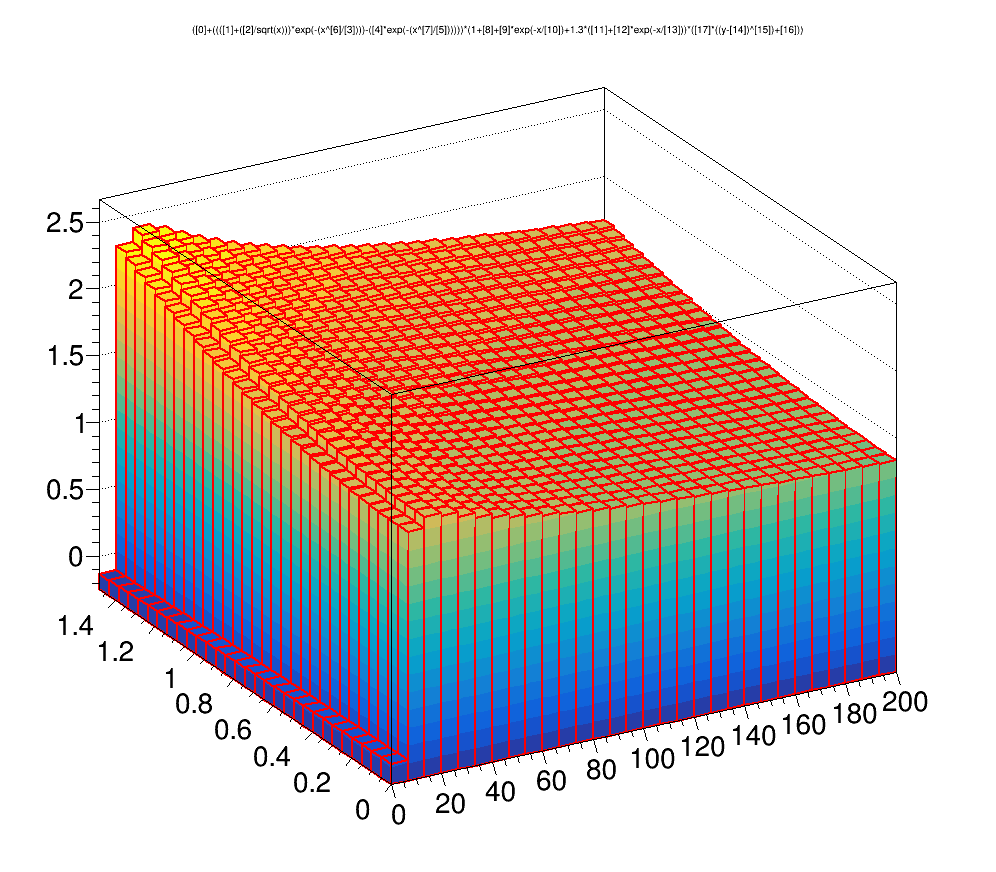

In [16]:
%jsroot off
c = TCanvas("c","",1000,900)
c.Draw()

fkBarrel.SetMinimum(-0.25)
fkBarrel.Draw("LEGO2")

c.Update()

In [14]:
%jsroot off
c1 = TCanvas("c1","",1000,900)
c1.Draw()
#c.SetLogx()


fsBarrel.SetMinimum(-0.25)
fsBarrel.Draw()
fsBarrel.SetLineColor(kRed)

fqBarrel.Draw("SAME")
fqBarrel.SetLineColor(kMagenta)

fkEndcap.Draw("SAME")
fkEndcap.SetLineColor(kBlue)

fqEndcap.Draw("SAME")
fqEndcap.SetLineColor(kBlack)

fsEndcap.Draw("SAME")
fsEndcap.SetLineColor(kCyan)

c.Update()
c.Print("ECALCorrs.pdf")
%jsroot on

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file ECALCorrs.pdf has been created


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


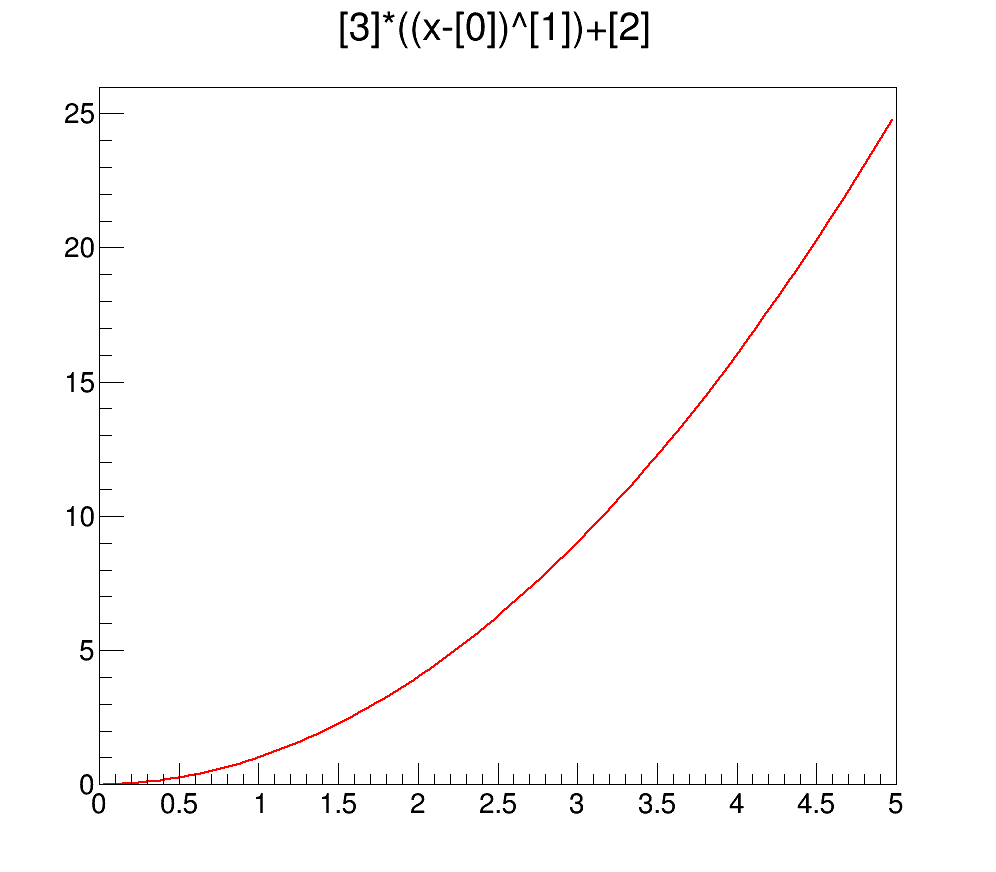

In [73]:
%jsroot off
c = TCanvas("c","",1000,900)
#c.SetLogx()
c.Draw()
#%jsroot on

#suu = TH1D("s","s",100,0,1000)
#suu.Draw()

#faBarrel.Draw()
#fbBarrel.Draw()
#fcBarrel.Draw()
#faEtaBarrelEH.Draw()
#fbEtaBarrelEH.Draw()
fcEtaBarrelEH.Draw()

foo.SetLineColor(kBlue)
foo.Draw("SAME")
c.Update()

#[grs,minmax] = plotter(c,Mus,2,2)
#grs[4].GetHistogram().SetMaximum(minmax[1])
#grs[4].GetHistogram().SetMinimum(minmax[0])
#grs[4].Draw('SAME')
#for i in range(len(grs)):
#    if i<3: continue
#    grs[i].SetTitle("Muon pt resolution")
#    grs[i].Draw('SAME')

#names=["TQAF","P8PowH","P8MadG","Herw++","17"]
#leg = TLegend(0.5,0.3,0.7,0.5)
#leg.SetBorderSize(0)
#leg.SetFillColor(0)
#leg.SetFillStyle(0)
#leg.SetTextFont(42)
#leg.SetTextSize(0.035)
#for i in range(len(names)):
#    leg.AddEntry(grs[i],names[i],"L")
#leg.Draw()

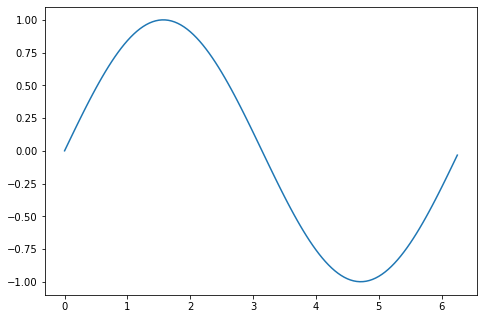

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline
x=np.arange(0,math.pi*2, 0.05)
y=np.sin(x)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y)

## Here we look at the DATA/MC ratio of the sigma's